<a href="https://colab.research.google.com/github/suzukimain/suzukimain_image_generation/blob/main/%E8%BB%BD%E9%87%8F%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#初めにランタイムをGPUに設定をお願いします。
# ランタイム>ランタイムのタイプを変更>ハードウェア アクセラレータ>GPUを選択>決定

#コードの実行方法は、ボックスの左側にある三角が書かれたボタンを押してください

In [ ]:
#コラボについて不安な方はバーにあるヘルプをクリックして、よくある質問をご覧ください。

In [1]:
#  1.これを実行してドライブの接続をお願いします
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title
# @markdown #2.ここでセットアップをします。ダウンロードには2分ほどかかります。
# @markdown 5Gくらいダウンロードしますが、自分のところではGoogleのサーバーにダウンロードしている関係か、そこまでパケットを消費しませんでした。参考までにお願いします
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install torch==2.0.1+cu118 diffusers==0.16.1 transformers==4.29.2 accelerate==0.19.0 scipy==1.10.1 safetensors==0.3.1 ftfy==6.1.1 regex==2022.10.31 tqdm==4.65.0 scipy==1.10.1 sentencepiece==0.1.99 pysbd==0.3.4 -q
!pip install git+https://github.com/Stability-AI/stablediffusion.git -q
!pip install git+https://github.com/openai/CLIP.git -q
import os
import clip
import spacy
import codecs
import pickle
import torch
import random
import numpy as np
import transformers
import sentencepiece
import ipywidgets as widgets 
from PIL import Image
from datetime import datetime 
from transformers import pipeline
from torch import Generator, autocast
from IPython.display import display, Markdown 
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from diffusers import EulerDiscreteScheduler, StableDiffusionImg2ImgPipeline
from transformers import pipeline
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
dtype = torch.float16
diffuser_kwargs = {
   "negative_prompt": "nsfw, ((((worst quality)))), ((((low quality)))), blurred, medium quality, deleted, lowres, comic, bad anatomy, (((bad hands)))", 
   "seed": 72566,
   "temperature": 0.8,
   "truncation": 0.7,
   "diffusion_steps": 200
}
model_id = "hakurei/waifu-diffusion"
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to(device)
pipe.safety_checker = None


入力する画像="/content/drive/MyDrive/入力する画像フォルダ"
if not os.path.exists(入力する画像):
    os.makedirs(入力する画像)


print("\033[32m画像生成の準備が出来ました。Googleドライブに作成された 生成した画像 というフォルダに入力する画像をアップロードしたあと、手順3に移ってください。\033[0m")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 105.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 125MiB/s]


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


画像生成の準備が出来ました。Googleドライブに作成された 生成した画像 というフォルダに入力する画像をアップロードしたあと、手順3に移ってください。


  0%|          | 0/40 [00:00<?, ?it/s]

画像生成が完了しました
保存先のパス:( /content/drive/MyDrive/生成した画像/seed(168576671)_20230531_123012.png)
ファイルの名前:(レミリア.jpg)
上記のようになります


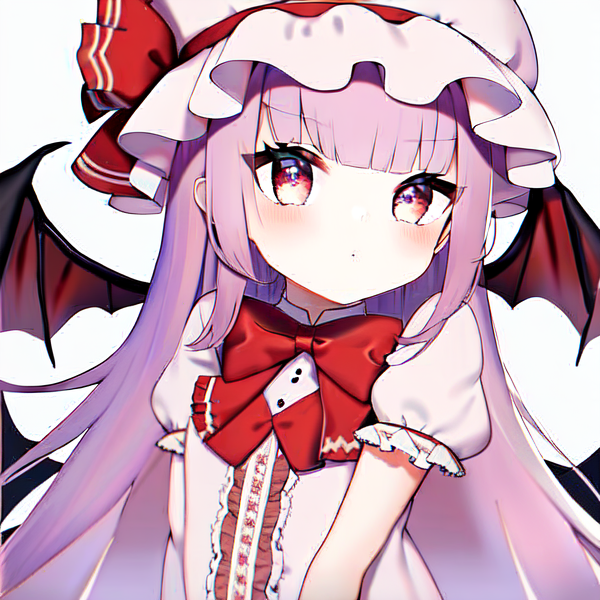

  0%|          | 0/40 [00:00<?, ?it/s]

画像生成が完了しました
保存先のパス:( /content/drive/MyDrive/生成した画像/seed(168576671)_20230531_123023.png)
ファイルの名前:(レミリア.jpg)
上記のようになります


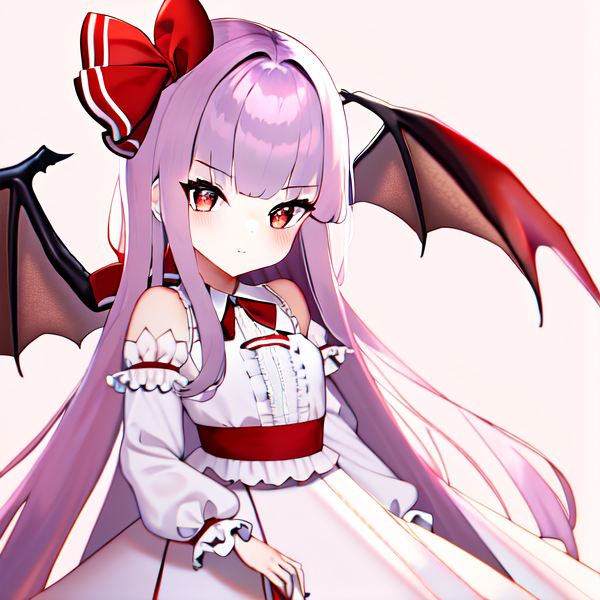

In [19]:
#  3.ここで生成します
seed値 = random.randint(1,4294967295)#32bitの最大値
温度 = 0.4 #@param {type:"slider", min:0, max:1, step:0.1}
雰囲気 = 0.4 #@param {type:"slider", min:0, max:1, step:0.1}
拡散ステップ = 400 #@param {type:"slider", min:50, max:800, step:50}
guidance_scale = 26 #@param {type:"slider", min:10, max:40, step:1}

#@markdown　温度はどのくら0.8をお勧めします

#@markdown　雰囲気は0.7をお勧めします

#@markdown 拡散ステップは100ほどをお勧めします

#@markdown guidance_scaleは25ほどをお勧めします



ネガティブプロント="(nsfw), ((((worst quality)))), ((((low quality)))), blurred, medium quality,purple hair, deleted, lowres, comic, bad anatomy, (((bad hands))), low resolution, blurry, pixelated, sketchy, nonsensical anatomy, unrealistic pose, mosaic, unclear details, distorted colors, unrealistic proportions, poor quality, fuzzy, out of focus, hazy, grainy, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, standard quality, bad feet_hand_finger_leg_eye, bad, text font ui, bad shadow, poorly drawn, black-white, ugly, duplicate, mutation, mutilated, malformed mutated, malformed, The background is incoherent, simple background, low-quality background, low background, bad body, long body, broken limb, anatomical nonsense, extra limbs, missing limb, incorrect limb, multiple heads, twisted head, poorly drawn face, head_wings, More than two cows, missing head, 1 unit with multiple heads, heads together, abnormal eye proportion, unclear eyes, bad eyes, fused eyes, poorly drawn eyes, bad mouth, poorly drawn mouth, bad tongue, too long tongue, bad ears, poorly drawn ears, extra ears, heavy ears, long neck, too thick neck, bad neck, large breasts, extra_breasts, fused breasts, bad breasts, missing arms, disappearing arms, extra arms, three arms, mutated hands and fingers, black hands, fused hand, missing fingers, extra digits, huge thighs, disappearing thigh, missing thighs, extra thighs, bad feet, bad legs, huge calf, disappearing legs, bad gloves, fused gloves, beard, artist name, text watermark, unnatural, obviously wrong, distorted face, floating hair, floating body parts, severed body parts, incorrect leg position, deformed, fused body and hands, disregard of physics, distorted shape, doll-like object not present in the image, body fusion, abnormal fingers, fingers resembling fish fins, dot eyes, unclear background, mosaic, body bending, incorrect leg-to-torso ratio, excessively large breasts, more than three limbs (hands/legs), unsettling appearance, eyes filled with solid color, lack of lower body, splitting, creepy doll-like appearance, distorted eyes, lines on the skin, legs bending in unnatural directions, abnormal finger count, missing arms, floating hands, lack of nose or mouth, hands emerging from impossible places, incorrect body part ratios"
new_diffuser_kwargs = {
   "negative_prompt":ネガティブプロント,
   "seed": seed値,
   "temperature": 温度,
   "truncation": 雰囲気,
   "diffusion_steps": 拡散ステップ
   }
diffuser_kwargs.update(new_diffuser_kwargs)
プロンプト = "Generate an oblique front view of Remilia Scarlett,solo,loli,purple hair" #@param {type:"string"}
prompt ="((8masterpiece))), ((best quality)), high quality, absurdres"+プロンプト
#@markdown プロンプトはなくても大丈夫です。
生成したい枚数 = 2 #@param {type:"slider", min:1, max:100, step:1}
num_images = 生成したい枚数
保存する先のパス= "/content/drive/MyDrive/生成した画像"
directory_path="/content/drive/MyDrive/入力する画像フォルダ"
def generate_images(directory_path):
  for filename in os.listdir(directory_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(directory_path, filename)
        if not os.path.exists(image_path):
           raise FileNotFoundError(f"申し訳ありません。Googleドライブ内にある 入力するフォルダ から画像を読み込めませんでした。次のパスのフォルダに画像が入っているか確認お願いします: {image_path}")
        init_image = Image.open(image_path)
        init_image = init_image.convert("RGB")
        init_image = init_image.resize((600, 600))
        for i in range(num_images):
            with autocast("cuda"):
                # 推論を実行し、結果を取得する
                result = pipe(prompt, image=init_image, negative_prompt=ネガティブプロント, guidance_scale=guidance_scale)
                generated_image = result.images[0]  # 生成された画像はリストの最初の要素に格納されている
                if not os.path.exists(保存する先のパス):
                    os.makedirs(保存する先のパス)
                seed=seed値
                date = datetime.now().strftime("%Y%m%d_%H%M%S")
                filenames = f"seed({seed})_{date}.png" # seed値を含めたファイル名を作成する
                path = os.path.join(保存する先のパス, filenames)
                generated_image.save(path)
                print("\033[34m画像生成が完了しました")
                print("保存先のパス:(\033[32m "+path+"\033[34m)")
                print("ファイルの名前:(\033[32m"+filename+"\033[34m)")
                print("上記のようになります")
                generated_image.show()

              
generate_images(directory_path)


#用語の説明

---

温度（Temperature）: 温度は、生成される画像の多様性やランダム性を制御するパラメータです。高い温度では、よりランダムな画像が生成されます。低い温度では、より具体的で制約された画像が生成されます。

---

雰囲気（Truncation）: 雰囲気は、生成される画像の特徴の程度を制御するパラメータです。高い雰囲気では、生成される画像はより原始的な特徴を持つ傾向があります。低い雰囲気では、より洗練された特徴を持つ画像が生成されます。

---

拡散ステップ（Diffusion Steps）: 拡散ステップは、生成プロセスの反復回数を指定するパラメータです。より多くの拡散ステップを指定すると、より多くのステップが実行され、生成されるに要する時間が長くなります。

---

ガイダンススケール（Guidance Scale）: ガイダンススケールは、入力のガイド画像が生成される画像に与える影響の程度を制御するパラメータです。高いガイダンススケールでは、ガイド画像がより強く反映され、生成される画像に類似した特徴が現れる傾向があります。低いガイダンススケールでは、ガイド画像の影響はより弱くなります。